# Exploraaaaaaaaaaation #

In [619]:
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import pylab

import pandas as pd
import seaborn as sns
import numpy as np

import json
from ast import literal_eval  # OP = OP, NP = P (by Articuno's Law)

%matplotlib inline

In [620]:
#datapath = 'data/'

In [621]:
plt.style.use('default')

In [622]:
# https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots
def suplabel(axis,label,label_prop=None,labelpad=5,ha='center',va='center'):
    ''' Add super ylabel or xlabel to the figure
    Similar to matplotlib.suptitle
    axis       - string: "x" or "y"
    label      - string
    label_prop - keyword dictionary for Text
    labelpad   - padding from the axis (default: 5)
    ha         - horizontal alignment (default: "center")
    va         - vertical alignment (default: "center")
    '''
    fig = pylab.gcf()
    xmin = []
    ymin = []
    for ax in fig.axes:
        xmin.append(ax.get_position().xmin)
        ymin.append(ax.get_position().ymin)
    xmin,ymin = min(xmin),min(ymin)
    dpi = fig.dpi
    if axis.lower() == "y":
        rotation=90.
        x = xmin-float(labelpad)/dpi
        y = 0.5
    elif axis.lower() == 'x':
        rotation = 0.
        x = 0.5
        y = ymin - float(labelpad)/dpi
    else:
        raise Exception("Unexpected axis: x or y")
    if label_prop is None: 
        label_prop = dict()
    pylab.text(x,y,label,rotation=rotation,transform=fig.transFigure,ha=ha,va=va,**label_prop)

## Loading Recipes ##

In [623]:
#filename = 'RAW_recipes.csv'

In [624]:
#df_recipes = pd.read_csv(datapath + filename, index_col='id')

In [625]:
#df_recipes['submitted'] = df_recipes['submitted'].astype('datetime64')

In [626]:
#for col in ['nutrition', 'tags', 'ingredients', 'steps']:
#    df_recipes[col] = df_recipes[col].apply(lambda x: literal_eval(x))

In [627]:
#df_recipes = df_recipes[df_recipes['minutes'] < 300]

## Loading Interactions ##

In [628]:
#filename = 'RAW_interactions.csv'

In [629]:
#df_inter = pd.read_csv(datapath + filename)

In [630]:
#df_inter['date'] = df_inter['date'].astype('datetime64')

## Avg rating, n votes and std ##

In [631]:
#data = [[i, df_sub.shape[0], df_sub.rating.mean(), df_sub.rating.std()] for i, df_sub in df_inter.groupby('recipe_id')]
#df_inter_recipe = pd.DataFrame(data, columns=['recipe_id', 'n_votes', 'avg_rating', 'std_rating'])

In [632]:
#df_inter_recipe = df_inter_recipe.set_index('recipe_id')

In [633]:
#df_inter_recipe

In [634]:
#df = df_recipes.join(df_inter_recipe)
#df.std_rating = df.std_rating.fillna(0)

In [635]:
#df

In [636]:
#df.describe()

In [637]:
#plot = sns.pairplot(df[['minutes', 'n_steps', 'n_ingredients', 'n_votes', 'avg_rating', 'std_rating']])
#plot.savefig('imgs/pairplot_recipes.png')

In [638]:
#with open('data/recipes.json', 'w') as f:
#    df.to_json(f, date_format='')

In [639]:
df = pd.read_json('data/recipes.json')

In [640]:
df.submitted = df.submitted.astype('datetime64')

## Things we don't want

In [641]:
# Recipes which take more than 5 hours
df = df[df['minutes'] < 300]

In [642]:
# We don't want oven or dessert recipes
index = df.tags.to_numpy()
f = lambda x: ('desserts' not in x and 'oven' not in x)
index = [f(x) for x in index]
df = df[index]

In [643]:
df

name  minutes  contributor_id  \
137739  arriba   baked winter squash mexican style       55           47892   
112140                   all in the kitchen  chili      130          196586   
44061           amish  tomato ketchup  for canning      190           41706   
5289                       apple a day  milk shake        0            1533   
25274                        aww  marinated olives       15           21730   
...                                            ...      ...             ...   
357451                                zydeco sauce       15          461283   
188810                          zydeco shrimp wrap       57           37779   
486161                                 zydeco soup       60          227978   
493372                            zydeco spice mix        5         1500678   
308080                   zydeco ya ya deviled eggs       40           37779   

        submitted                                               tags  \
137739 2005-09-16  [60-minutes-or-less, time-to-make, course, mai...   
112140 2005-02-25  [time-to-make, course, preparation, main-dish,...   
44061  2002-10-25  [weeknight, time-to-make, course, main-ingredi...   
5289   1999-12-06  [15-minutes-or-less, time-to-make, course, mai...   
25274  2002-04-14  [15-minutes-or-less, time-to-make, course, mai...   
...           ...                                                ...   
357451 2009-02-23  [15-minutes-or-less, time-to-make, course, cui...   
188810 2006-10-03  [60-minutes-or-less, time-to-make, course, mai...   
486161 2012-08-29  [ham, 60-minutes-or-less, time-to-make, course...   
493372 2013-01-09  [15-minutes-or-less, time-to-make, course, pre...   
308080 2008-06-07  [60-minutes-or-less, time-to-make, course, mai...   

                                          nutrition  n_steps  \
137739        [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
112140   [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
44061     [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   
5289       [160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]        4   
25274      [380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]        4   
...                                             ...      ...   
357451    [239.9, 30.0, 19.0, 22.0, 1.0, 14.0, 5.0]        3   
188810   [482.6, 13.0, 25.0, 37.0, 33.0, 9.0, 27.0]       14   
486161  [415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]        7   
493372        [14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]        1   
308080         [59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]        7   

                                                    steps  \
137739  [make a choice and proceed with recipe, depend...   
112140  [brown ground beef in large pot, add chopped o...   
44061   [mix all ingredients& boil for 2 1 / 2 hours ,...   
5289    [combine ingredients in blender, cover and ble...   
25274   [toast the fennel seeds and lightly crush them...   
...                                                   ...   
357451  [to make the sauce , combine the mayonnaise , ...   
188810  [bring 3 quarts salted to water to a boil, add...   
486161  [heat oil in a 4-quart dutch oven, add celery ...   
493372          [mix all ingredients together thoroughly]   
308080  [in a bowl , combine the mashed yolks and mayo...   

                                              description  \
137739  autumn is my favorite time of year to cook! th...   
112140  this modified version of 'mom's' chili was a h...   
44061   my dh's amish mother raised him on this recipe...   
5289                                                 None   
25274   my italian mil was thoroughly impressed by my ...   
...                                                   ...   
357451  great sauce for cheeseburgers or dipping fries...   
188810             a wrap inspired by great cajun flavors   
486161  this is a delicious soup that i originally fou...   
493372    this spice mix will make your taste buds dance!   
308080                          deviled eggs, cajun-style  

## Tag Analysis ##

In [644]:
df['tag_n'] = df['tags'].apply(lambda x:len(x))

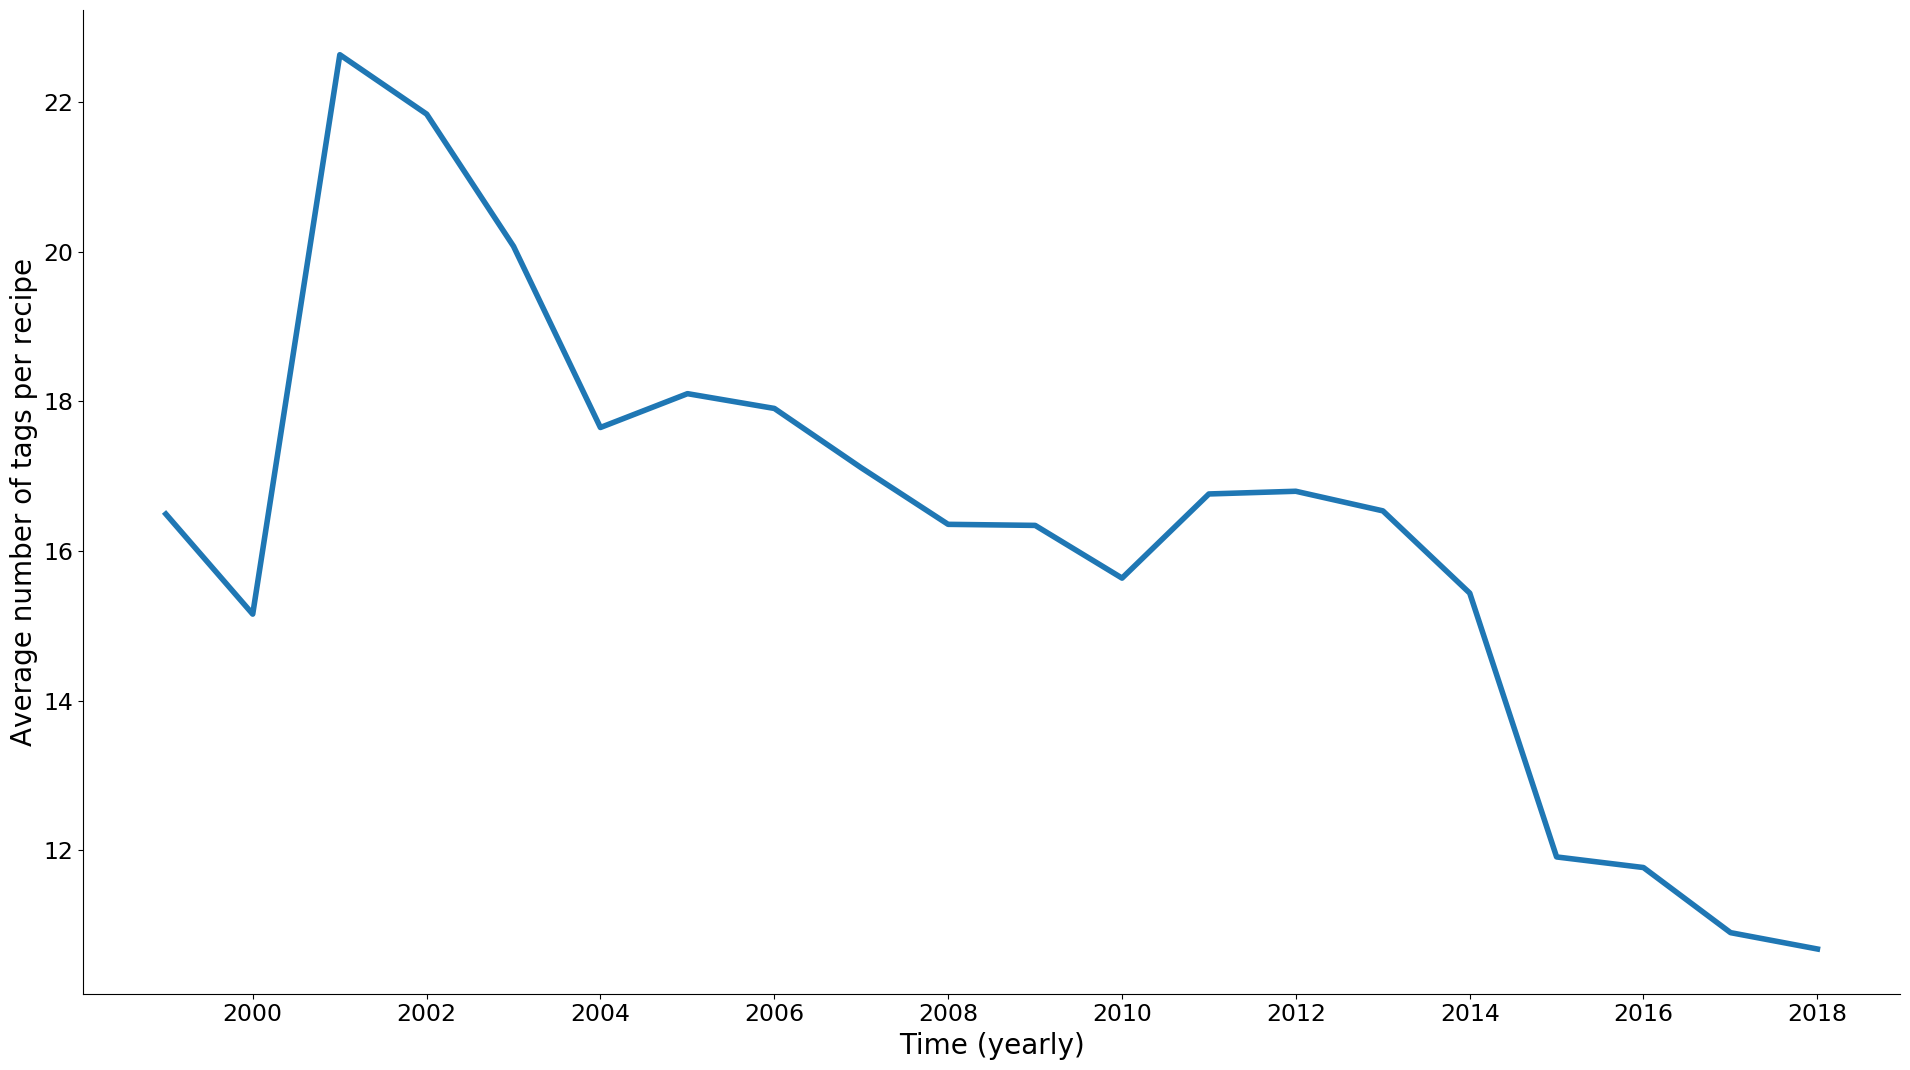

In [645]:
lo = df.copy()
lo['submitted'] = lo['submitted'].astype('datetime64[Y]')
lo = lo.groupby('submitted').mean()

fig, ax = plt.subplots(figsize = (19.2, 10.8))

ax.plot(lo.index, lo['tag_n'], lw=4)

#ax.set_title('Evolution of number of tags per recipe', fontsize=25)
ax.set_ylabel('Average number of tags per recipe', fontsize=20)
ax.set_xlabel('Time (yearly)', fontsize=20)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()

fig.savefig('imgs/tags_per_recipe.png')

plt.show()

In [646]:
df['tags'].to_numpy()[:2]

array([list(['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']),
       list(['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less'])],
      dtype=object)

In [647]:
df.tags

137739    [60-minutes-or-less, time-to-make, course, mai...
112140    [time-to-make, course, preparation, main-dish,...
44061     [weeknight, time-to-make, course, main-ingredi...
5289      [15-minutes-or-less, time-to-make, course, mai...
25274     [15-minutes-or-less, time-to-make, course, mai...
                                ...                        
357451    [15-minutes-or-less, time-to-make, course, cui...
188810    [60-minutes-or-less, time-to-make, course, mai...
486161    [ham, 60-minutes-or-less, time-to-make, course...
493372    [15-minutes-or-less, time-to-make, course, pre...
308080    [60-minutes-or-less, time-to-make, course, mai...
Name: tags, Length: 156948, dtype: object

In [648]:
tags = [j for i in df.tags for j in i]

In [649]:
tags_dict = Counter(tags)

In [650]:
tags_dict.most_common(50)

[('preparation', 156536),
 ('time-to-make', 155473),
 ('course', 145054),
 ('main-ingredient', 118171),
 ('dietary', 110524),
 ('easy', 89755),
 ('occasion', 71146),
 ('cuisine', 64027),
 ('low-in-something', 60895),
 ('main-dish', 54364),
 ('60-minutes-or-less', 45526),
 ('vegetables', 43101),
 ('30-minutes-or-less', 42586),
 ('meat', 41465),
 ('15-minutes-or-less', 36761),
 ('3-steps-or-less', 36736),
 ('number-of-servings', 36234),
 ('low-carb', 34551),
 ('north-american', 31020),
 ('taste-mood', 30586),
 ('4-hours-or-less', 29923),
 ('low-calorie', 29889),
 ('healthy', 29765),
 ('equipment', 29578),
 ('low-cholesterol', 29333),
 ('low-sodium', 28768),
 ('vegetarian', 26143),
 ('low-saturated-fat', 25303),
 ('5-ingredients-or-less', 24590),
 ('beginner-cook', 24435),
 ('dinner-party', 23657),
 ('inexpensive', 22752),
 ('low-protein', 22502),
 ('side-dishes', 21891),
 ('healthy-2', 21617),
 ('pasta-rice-and-grains', 21076),
 ('for-1-or-2', 20102),
 ('american', 19290),
 ('poultry', 1

In [651]:
tags_dict.get('north-american')  # Biased towards low quality food

31020

In [652]:
# We will create dummies for these tags. For some of them, we are interested in True values, for others, in False
# healthy and healthy-2 will be combined
custom_tags = ['vegetarian', 'healthy', 'healthy-2', 'italian', 'beginner-cook', 'inexpensive', 'european']

In [653]:
df_tag = df.copy()[['submitted', 'tags', 'n_votes', 'avg_rating', 'std_rating']]

In [654]:
d_tags = df.tags.to_numpy()

for tag in custom_tags:
    dummy = np.array([tag in tags for i, tags in enumerate(d_tags)]).astype(int)
    df_tag[tag] = dummy

In [655]:
df_tag.healthy = df_tag.healthy.combine(df_tag['healthy-2'], func=max)
df_tag = df_tag.drop(columns='healthy-2')

In [656]:
df_tag = df_tag.drop(columns='tags')

In [657]:
df_tag

submitted  n_votes  avg_rating  std_rating  vegetarian  healthy  \
137739 2005-09-16        3         5.0         0.0           1        0   
112140 2005-02-25        1         4.0         0.0           0        0   
44061  2002-10-25        1         5.0         0.0           1        0   
5289   1999-12-06        2         5.0         0.0           0        0   
25274  2002-04-14        1         2.0         0.0           1        0   
...           ...      ...         ...         ...         ...      ...   
357451 2009-02-23        2         5.0         0.0           0        0   
188810 2006-10-03        1         3.0         0.0           0        1   
486161 2012-08-29        6         5.0         0.0           0        0   
493372 2013-01-09        1         5.0         0.0           1        0   
308080 2008-06-07        5         5.0         0.0           0        0   

        italian  beginner-cook  inexpensive  european  
137739        0              0            0         0  
112140        0              0            0         0  
44061         0              0            0         0  
5289          0              0            0         0  
25274         0              0            0         0  
...         ...            ...          ...       ...  
357451        0              1            1         0  
188810        0              0            0         0  
486161        0              0            0         0  
493372        0              0            0         0  
308080        0              0            0         0  

[156948 rows x 10 columns]

In [658]:
# Change dates to just represent the month
df_tag.submitted = df_tag.submitted.astype('datetime64[M]')

In [659]:
df_tag = df_tag[(df_tag['vegetarian']== 1)  | (df_tag['italian']== 1)  | (df_tag['healthy']== 1)  | (df_tag['beginner-cook'] == 1)  | (df_tag['inexpensive'] == 1)  | (df_tag['european']== 1)]

In [660]:
tags = ['vegetarian', 'italian',  'healthy', 'beginner-cook', 'inexpensive', 'european']

data = {tag: df_tag[df_tag[tag] == 1].submitted.value_counts() for tag in tags}
for k,v in data.items():
    data[k] = v.sort_index()

In [661]:
def sumseries(x, y):
    if np.isnan(x):
        return y
    elif np.isnan(y):
        return x
    else:
        return x+y

In [662]:
total = data['vegetarian']
for i, ele in enumerate(data):
    if i > 0:
        total = total.combine(data[ele], func=sumseries)

In [663]:
for tag, dic in data.items():
    data[tag] = pd.Series({k:v/total[k] for k, v in data[tag].items()})

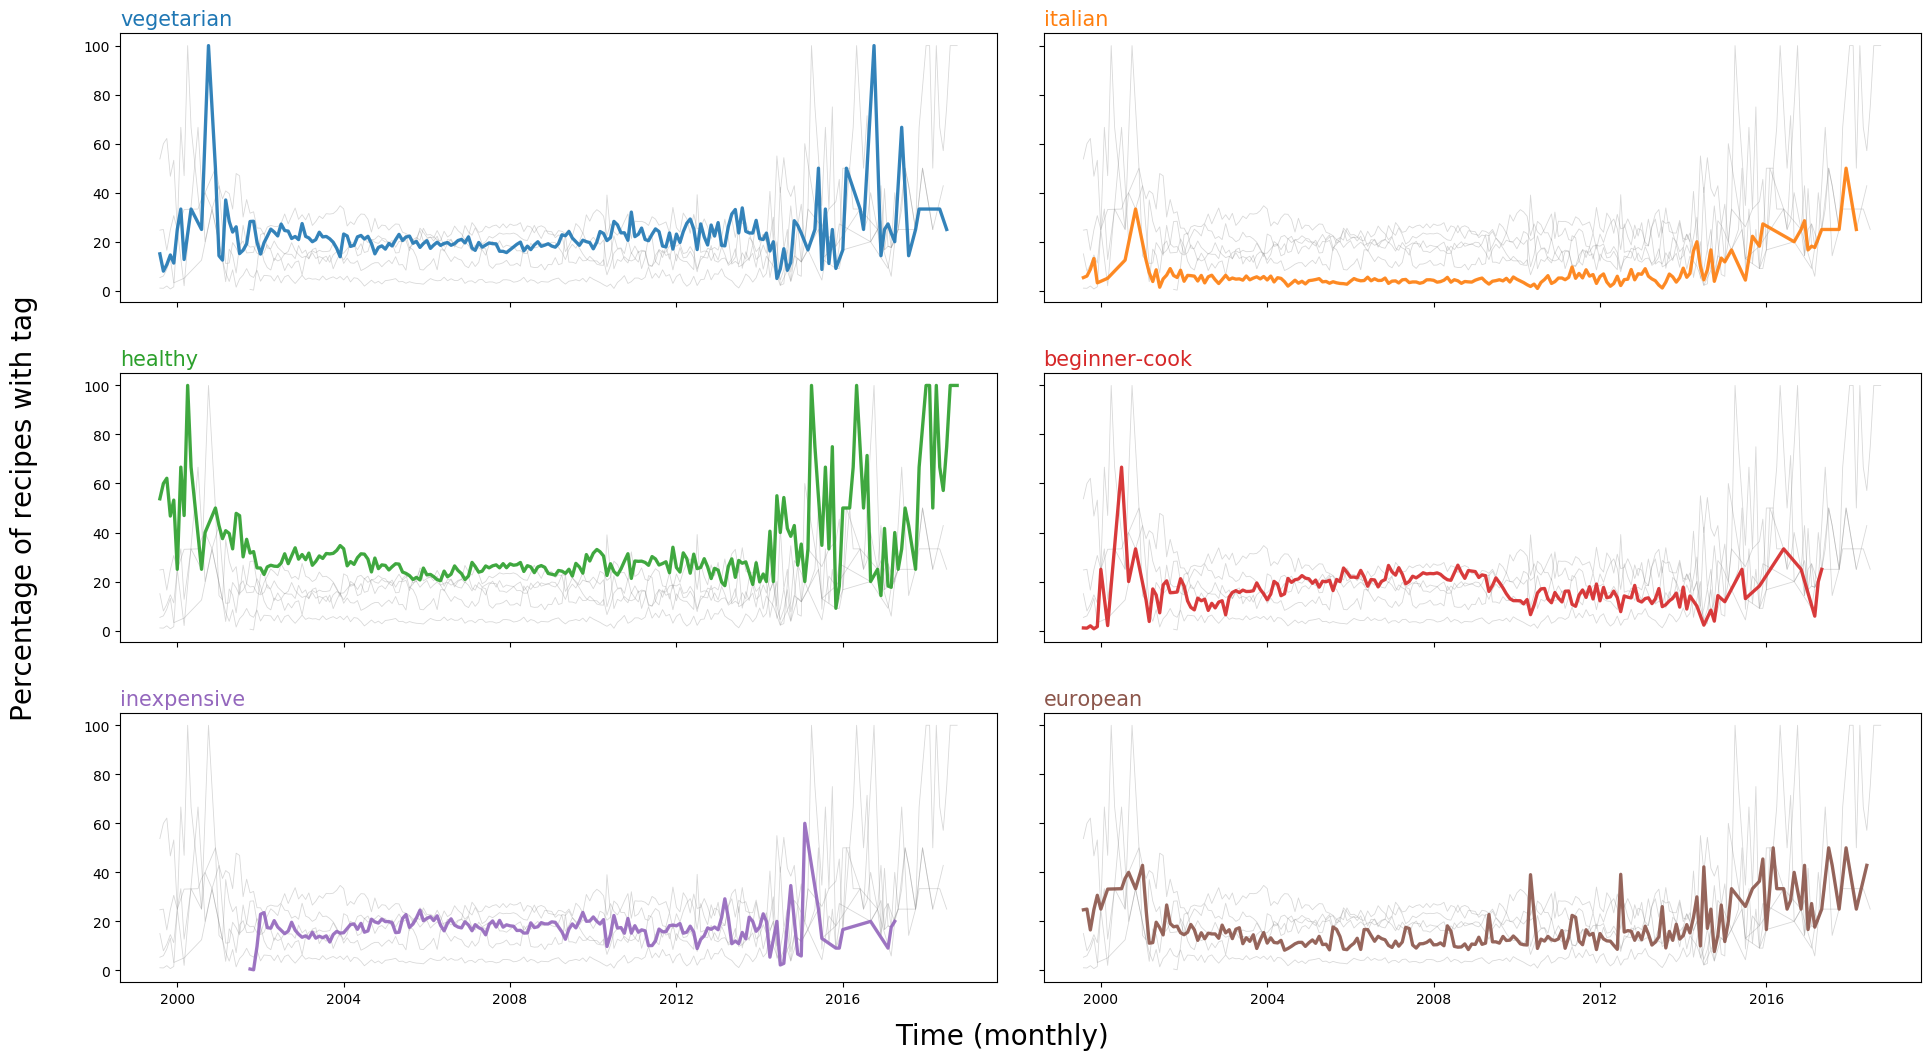

In [664]:
palette = plt.get_cmap('Set1')
fig, ax = plt.subplots(3, 2, figsize=(19.2, 10.8), sharex=True, sharey=True)
for i, ele in enumerate(data):
    j = i // 2
    k = i % 2
    for entry in data.keys():
        ax[j][k].plot(data[entry].index, data[entry].to_numpy()*100, marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data[ele].index, data[ele].to_numpy()*100, marker = '', color='C{}'.format(i), lw = 2.4, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=15, fontweight=0, color='C{}'.format(i))
    
#fig.suptitle('Evolution of tag frequency (yearly)', fontsize=25)    
    
fig.tight_layout(pad=3)

suplabel('x', 'Time (monthly)', {'fontsize':20})
suplabel('y', 'Percentage of recipes with tag', {'fontsize':20})

fig.savefig('imgs/tags_monthly.png')

plt.show()

### Tags Yearly ###

In [665]:
df_tag2 = df_tag.copy()
df_tag2.submitted = df_tag2.submitted.astype('datetime64[Y]')

In [666]:
data2 = {tag: df_tag2[df_tag2[tag] == 1].submitted.value_counts() for tag in tags}
for k,v in data2.items():
    data2[k] = v.sort_index()

In [667]:
#total = data2['vegetarian']
#for i, ele in enumerate(data2):
#    if i > 0:
#        total = total.combine(data2[ele], func=sumseries)

In [668]:
# Get number of monthly recipes
df_year = df.copy()
df_year.submitted = df_year.submitted.astype('datetime64[Y]')

In [669]:
total_dict = {k: v.shape[0] for k, v in df_year.groupby('submitted')}
total = pd.Series(total_dict)

In [670]:
data2

{'vegetarian': 1999-01-01      60
 2000-01-01      32
 2001-01-01     470
 2002-01-01    2122
 2003-01-01    1638
 2004-01-01    1492
 2005-01-01    2934
 2006-01-01    3401
 2007-01-01    3739
 2008-01-01    3338
 2009-01-01    2857
 2010-01-01    1615
 2011-01-01    1050
 2012-01-01     679
 2013-01-01     579
 2014-01-01      98
 2015-01-01      14
 2016-01-01       7
 2017-01-01      16
 2018-01-01       2
 Name: submitted, dtype: int64, 'italian': 1999-01-01     40
 2000-01-01     12
 2001-01-01    136
 2002-01-01    476
 2003-01-01    396
 2004-01-01    297
 2005-01-01    529
 2006-01-01    772
 2007-01-01    785
 2008-01-01    728
 2009-01-01    591
 2010-01-01    228
 2011-01-01    313
 2012-01-01    134
 2013-01-01     99
 2014-01-01     44
 2015-01-01     11
 2016-01-01      4
 2017-01-01     10
 2018-01-01      1
 Name: submitted, dtype: int64, 'healthy': 1999-01-01     271
 2000-01-01     103
 2001-01-01     675
 2002-01-01    2580
 2003-01-01    2330
 2004-01-01    2119
 2

In [671]:
for tag, dic in data2.items():
    data2[tag] = pd.Series({k:v/total[k] for k, v in data2[tag].items()})

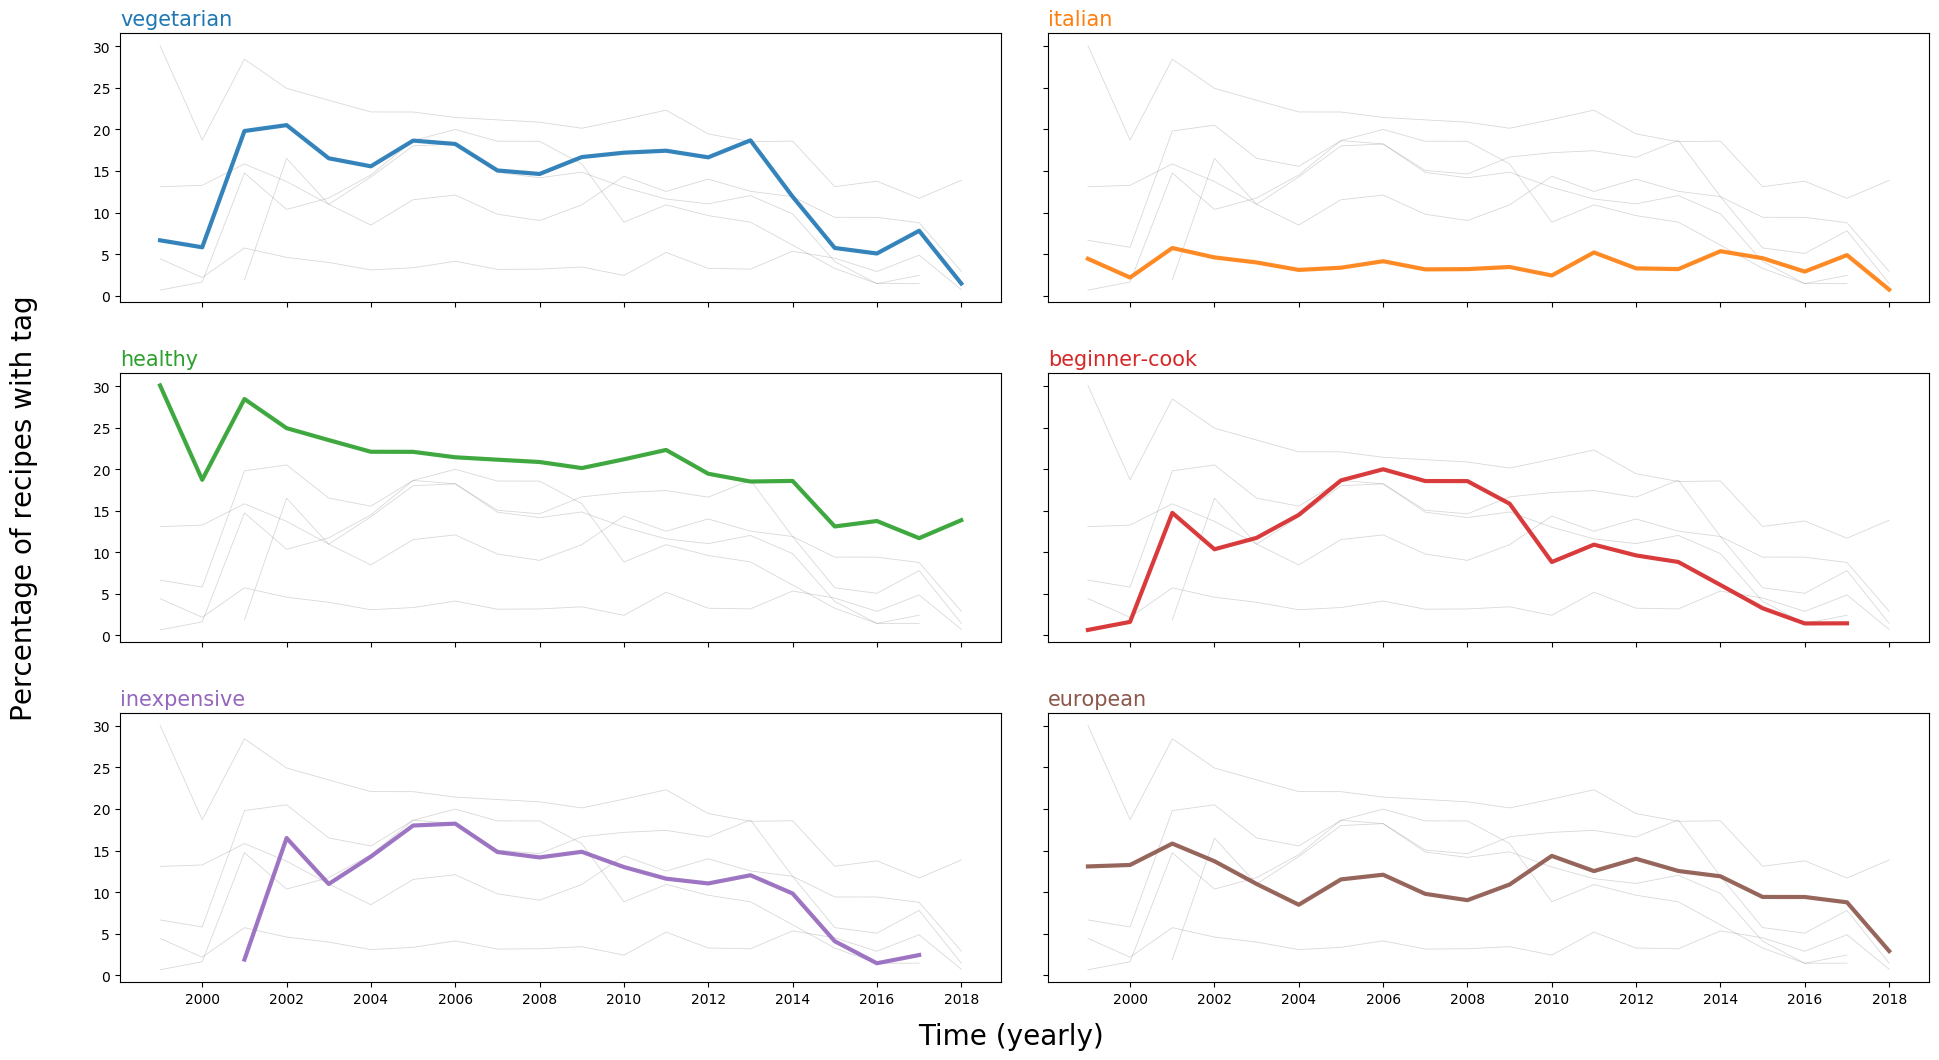

In [672]:
#plt.style.use('seaborn-darkgrid')
#palette = plt.get_cmap('Accent')
fig, ax = plt.subplots(3, 2, figsize=(19.2, 10.8), sharex=True, sharey=True)
for i, ele in enumerate(data2):
    j = i // 2
    k = i % 2
    for entry in data2.keys():
        ax[j][k].plot(data2[entry].index, data2[entry].to_numpy()*100, marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data2[ele].index, data2[ele].to_numpy()*100, marker = '', color='C{}'.format(i), lw = 3, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=15, fontweight=0, color='C{}'.format(i))

#fig.title('Evolution of tag frequency (monthly)')

fig.tight_layout(pad=3)

suplabel('x', 'Time (yearly)', {'fontsize':20})
suplabel('y', 'Percentage of recipes with tag', {'fontsize':20})


fig.savefig('imgs/tags_yearly.png')
plt.show()


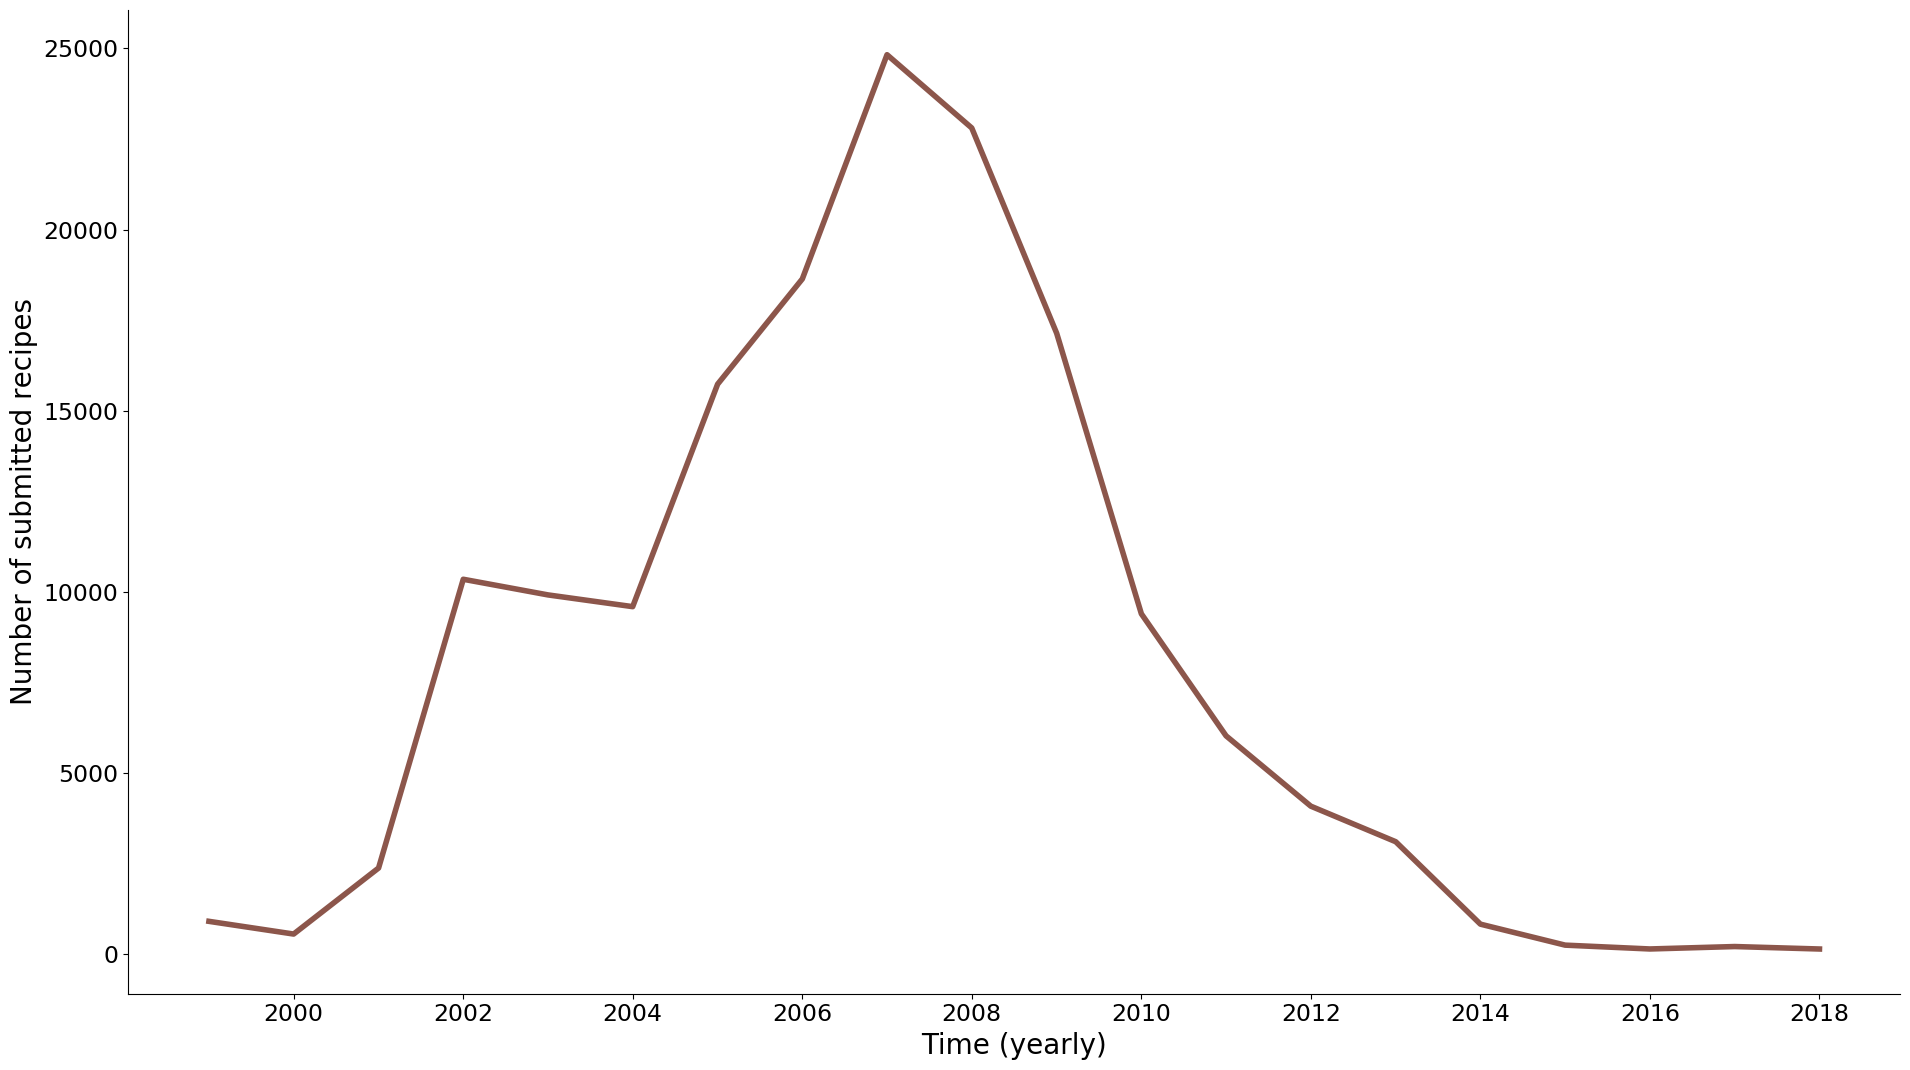

In [673]:
# Plotting yearly total

#palette = plt.get_cmap('Accent')
fig, ax = plt.subplots(figsize=(19.2, 10.8))

ax.plot(total.index, total.to_numpy(), marker = '', color='C{}'.format(i), lw = 4)
#plt.title('Total recipe counts')

ax.set_ylabel('Number of submitted recipes', fontsize=20)
ax.set_xlabel('Time (yearly)', fontsize=20)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


fig.tight_layout()
fig.savefig('imgs/tags_yearly_total.png')
plt.show()

## Ingredients (vegetarian and healthy)##

In [674]:
index = (df_tag[(df_tag.vegetarian == 1) & (df_tag.healthy == 1)]).index
df_ing = df.loc[index]
df_ing

name  minutes  \
81185                     mock a mole   low fat guacamole       15   
30300                       munch without guilt  tomatoes       10   
112959                     sour cream  avocado dip  vegan       10   
63793    tide me over   indian chaat  simple veggie salad        2   
120297              middle eastern   twice baked potatoes      110   
...                                                   ...      ...   
97323                     zucchini  peppers  and tomatoes       40   
142932                 zucchini  pignoli and raisin salad       10   
413205  zucchini  courgettes sauteed with sun dried to...       40   
455000                                       zulu cabbage       40   
196201                   zurie s overnight no knead bread       70   

        contributor_id  submitted  \
81185            67026 2004-01-15   
30300             6164 2002-06-04   
112959          167849 2005-03-08   
63793            12657 2003-06-05   
120297          197023 2005-05-02   
...                ...        ...   
97323            19166 2004-08-08   
142932           47892 2005-10-27   
413205          485109 2010-02-16   
455000         1058097 2011-05-04   
196201          200862 2006-11-18   

                                                     tags  \
81185   [15-minutes-or-less, time-to-make, course, mai...   
30300   [15-minutes-or-less, time-to-make, course, mai...   
112959  [lactose, 15-minutes-or-less, time-to-make, co...   
63793   [15-minutes-or-less, time-to-make, course, mai...   
120297  [time-to-make, course, main-ingredient, cuisin...   
...                                                   ...   
97323   [60-minutes-or-less, time-to-make, course, mai...   
142932  [15-minutes-or-less, time-to-make, course, mai...   
413205  [weeknight, 60-minutes-or-less, time-to-make, ...   
455000  [60-minutes-or-less, time-to-make, course, mai...   
196201  [time-to-make, course, main-ingredient, prepar...   

                                          nutrition  n_steps  \
81185       [115.9, 7.0, 21.0, 19.0, 9.0, 3.0, 5.0]        7   
30300           [3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]        3   
112959         [12.8, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]        6   
63793         [73.1, 1.0, 15.0, 0.0, 5.0, 3.0, 4.0]        4   
120297   [327.6, 11.0, 16.0, 14.0, 21.0, 6.0, 18.0]       14   
...                                             ...      ...   
97323      [135.8, 14.0, 28.0, 2.0, 5.0, 21.0, 3.0]        8   
142932     [251.8, 31.0, 48.0, 0.0, 7.0, 11.0, 5.0]        8   
413205       [115.4, 7.0, 33.0, 6.0, 8.0, 3.0, 5.0]       12   
455000        [94.0, 7.0, 25.0, 4.0, 4.0, 3.0, 4.0]        5   
196201  [1379.6, 5.0, 12.0, 194.0, 79.0, 3.0, 96.0]       82   

                                                    steps  \
81185   [thaw peas by running hot water over them in a...   
30300   [put a slice of tomato on each biscuit / crack...   
112959  [peel and pit avocado , put in a large mixing ...   
63793   [toss everything well in a serving bowl, grab ...   
120297  [preheat the oven to 200c, wash the potatoes t...   
...                                                   ...   
97323   [wash , trim , and slice zucchini, salt zucchi...   
142932  [cut the zucchini into narrow strips, add to t...   
413205  [place the sundried tomatoes in the 3 / 4 cup ...   
455000  [heat the oil in a large skillet, add onion an...   
196201  [since first making this bread according to th...   

                                              description  \
81185                        from crescent dragonwagon's    
30300   anytime munchies...another sweat free preparat...   
112959  i made this up when i had an avocado that was ...   
63793   this version of the famous indian chaat (prono...   
120297  a delicious yet low-fat twice-baked potato sid...   
...                                                   ...   
97323   this is a really quick, simple, and flavorful ...   
142932  from diane seed's mediterranean dish

In [675]:
ingredients = [j for i in df_ing.ingredients for j in i]

In [676]:
ingredients_dict = Counter(ingredients)

In [677]:
ingredients_dict.most_common(50)

[('salt', 3406),
 ('olive oil', 2086),
 ('water', 1830),
 ('onion', 1449),
 ('garlic cloves', 1331),
 ('sugar', 1217),
 ('tomatoes', 907),
 ('garlic', 818),
 ('salt and pepper', 704),
 ('lemon juice', 690),
 ('pepper', 583),
 ('extra virgin olive oil', 564),
 ('butter', 554),
 ('garlic clove', 544),
 ('black pepper', 532),
 ('vegetable oil', 493),
 ('honey', 456),
 ('ground cumin', 449),
 ('carrots', 437),
 ('red onion', 436),
 ('oil', 410),
 ('zucchini', 404),
 ('carrot', 399),
 ('fresh cilantro', 395),
 ('onions', 390),
 ('parmesan cheese', 363),
 ('cinnamon', 363),
 ('fresh parsley', 363),
 ('potatoes', 355),
 ('brown sugar', 352),
 ('flour', 346),
 ('milk', 344),
 ('cumin', 325),
 ('baking powder', 321),
 ('fresh lemon juice', 311),
 ('soy sauce', 304),
 ('chili powder', 304),
 ('cilantro', 303),
 ('celery', 303),
 ('fresh ground black pepper', 296),
 ('black beans', 291),
 ('red bell pepper', 291),
 ('chickpeas', 277),
 ('parsley', 275),
 ('orange juice', 270),
 ('cayenne pepper',

In [678]:
# We will use not = to filter, but contains, so that garlic cloves and garlic clove are grouped, and so on...
ing_custom = ['onion', 'garlic', 'tomato', 'cheese', 'egg', 'carrot']

In [679]:
d_ings = df_ing.ingredients.to_numpy()

for ing in ing_custom:
    dummy = np.array([np.array([ing in ingr for ingr in ings]).any() for ings in d_ings]).astype(int)
    df_ing[ing] = dummy

In [680]:
df_ing.submitted = df_ing.submitted.astype('datetime64[Y]')

In [681]:
data = {ing: df_ing[df_ing[ing] == 1].submitted.value_counts() for ing in ing_custom}
for k,v in data.items():
    data[k] = v.sort_index()

In [682]:
for ing, dic in data.items():
    data[ing] = pd.Series({k:v/total[k] for k, v in data[ing].items()})

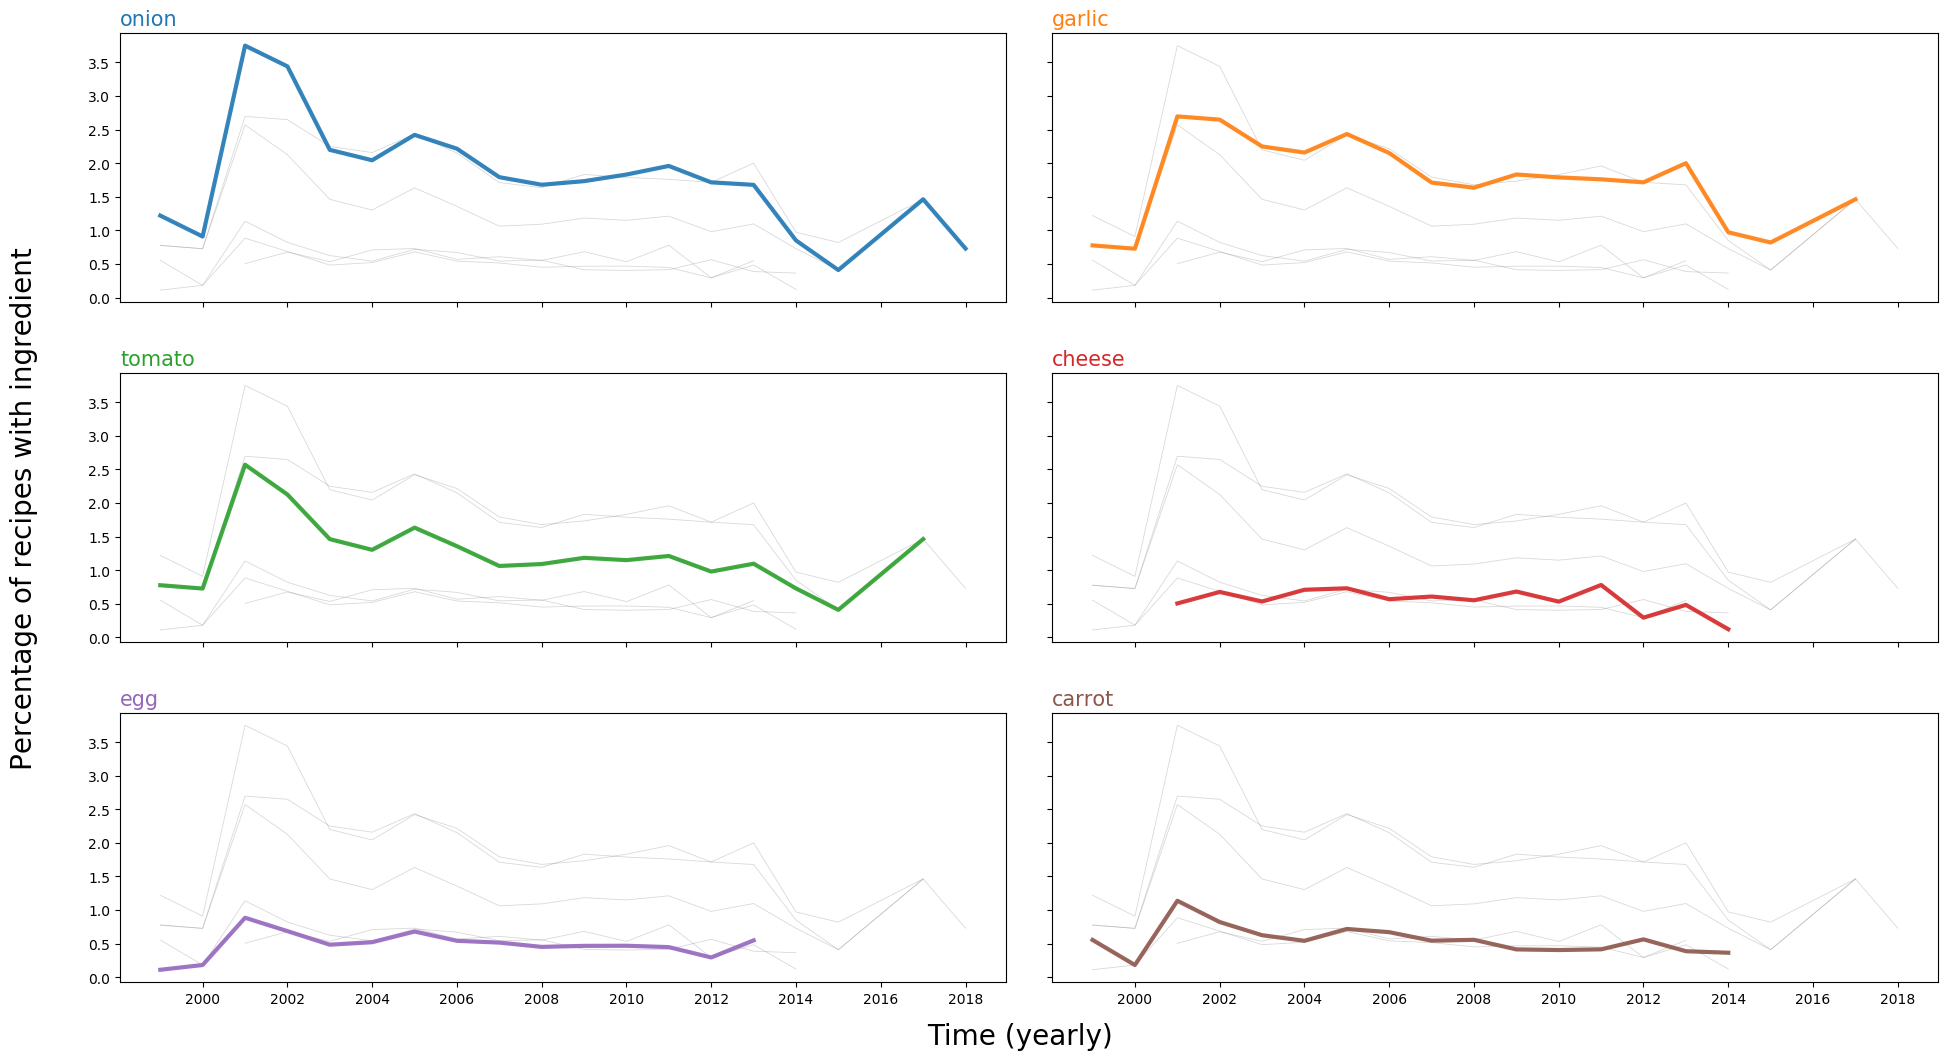

In [683]:
#plt.style.use('seaborn-darkgrid')

#palette = plt.get_cmap('Accent')
fig, ax = plt.subplots(3, 2, figsize=(19.2, 10.8), sharex=True, sharey=True)
for i, ele in enumerate(data):
    j = i // 2
    k = i % 2
    for entry in data.keys():
        ax[j][k].plot(data[entry].index, data[entry].to_numpy()*100, marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data[ele].index, data[ele].to_numpy()*100, marker = '', color='C{}'.format(i), lw = 3, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=15, fontweight=0, color='C{}'.format(i))

fig.tight_layout(pad=3)

#plt.title('Ingredient evolution for healthy and vegetarian recipes')

suplabel('x', 'Time (yearly)', {'fontsize':20})
suplabel('y', 'Percentage of recipes with ingredient', {'fontsize':20})

fig.savefig('imgs/ing_yearly.png')
plt.show()

In [684]:
for i in df_ing.ingredients:
    print(i)
df_ing

['frozen peas', 'hass avocado', 'salt', 'lemons, juice of', 'tomatoes', 'onion', 'cilantro']
['tomatoes', 'crackers', 'mayonnaise', 'black pepper']
['soft silken tofu', 'avocado', 'chunky salsa', 'fresh cilantro', 'lime juice', 'hot sauce', 'salt and pepper']
['cucumber', 'potato', 'chopped tomato', 'plain yogurt', 'chat masala', 'paprika', 'salt']
['baking potatoes', 'olive oil', 'chickpeas', 'coriander', 'ground cumin', 'fresh coriander', 'garlic cloves', 'low-fat yogurt', 'tahini', 'salt & freshly ground black pepper']
['rice vinegar', 'maple syrup', 'soy sauce', 'sesame oil', 'gingerroot', 'green cabbage', 'red cabbage', 'carrot', 'green onion', 'apple']
['ghee', 'kidney beans', 'onion', 'garlic clove', 'carrot', 'potatoes', 'garam masala', 'curry powder', 'tabasco sauce', 'salt and pepper', 'water']
['black beans', 'oil', 'frozen corn', 'garlic', 'onion', 'cumin', 'green chili sauce', 'salsa', 'chili powder', 'flour', 'dry breadcrumbs']
['plain tomato juice', 'old bay seasoning']


['water', 'frozen cranberries', 'oranges', 'walnuts', 'honey', 'vanilla extract', 'ice cubes']
['cranberry juice', 'orange juice', 'red wine', 'orange']
['cranberries', 'granulated sugar', 'cranberry juice', 'vanilla extract', 'orange zest']
['fresh cranberries', 'apple', 'orange', 'dates']
['cranberries', 'orange juice', 'orange zest', 'sugar', 'pineapple tidbits', 'cinnamon']
['cranberries', 'red apple', 'celery', 'green seedless grape', 'raisins', 'walnuts', 'sugar', 'ground cinnamon', 'vanilla yogurt']
['garbanzo beans', 'celery', 'dried cranberries', 'walnuts', 'scallion', 'sea salt', 'fresh ground pepper', 'tahini', 'cider vinegar', 'water', 'pure maple syrup', 'lettuce', 'bread']
['sweet potatoes', 'onion', 'unsalted butter', 'cranberries', 'pure maple syrup', 'water', 'cranberry juice', 'salt', 'walnuts', 'dijon mustard', 'pepper', 'chives']
['fresh cranberries', 'brown sugar', 'sliced almonds', 'wild rice', 'cooked brown rice', 'celery', 'fresh orange juice', 'red wine vinegar

['whole wheat flour', 'soy flour', 'all-purpose flour', 'baking powder', 'ground cinnamon', 'ground nutmeg', 'ground allspice', 'salt', 'sugar', 'raisins', 'ground flax seeds', 'molasses', 'applesauce', 'soymilk', 'vegetable oil']
['canola oil', 'green onion', 'shiitake mushroom', 'celery', 'frozen peas and carrot', 'ginger', 'minced garlic cloves', 'cooked white rice', 'reduced sodium soy sauce', 'vinegar', 'sesame oil']
['white whole wheat flour', 'baking soda', 'cinnamon', 'pumpkin pie spice', 'banana', 'nonfat plain yogurt', 'skim milk', 'brown sugar', 'canola oil', 'eggs', 'vanilla extract', 'banana flavoring']
['black beans', 'tomatoes', 'onion', 'garlic cloves', 'fresh cilantro', 'olive oil', 'ground cumin', 'lime juice', 'salt and pepper']
['zucchini', 'carrot', 'salt', 'unbleached flour', 'baking soda', 'baking powder', 'cinnamon', 'nutmeg', 'cardamom', 'eggs', 'applesauce', 'brown sugar', 'canned pumpkin', 'vanilla extract', 'lemon peel', 'walnuts', 'raisins']
['zucchini', 's

['onion', 'garlic', 'fresh ginger', 'red wine', 'cumin', 'cinnamon', 'paprika', 'crushed red pepper flakes', 'water', 'salt', 'sweet potatoes', 'dried apricot', 'chickpeas', 'raisins', 'lemon juice', 'sliced almonds']
['carrot', 'dried apricot', 'fresh gingerroot', 'lemon, rind of', 'orange zest', 'saffron', 'ground cumin', 'ground coriander', 'ground cinnamon', 'salt', 'orange juice', 'fresh lemon juice', 'vegetable oil', 'water', 'red bell pepper', 'english pea', 'couscous', 'kalamata olive', 'pine nuts', 'dried currant']
['onion', 'garlic cloves', 'olive oil', 'soy crumbles', 'saffron thread', 'turmeric', 'water', 'diced tomatoes', 'masoor dal', 'lemon, juice and zest of', 'cinnamon', 'allspice', 'salt and pepper']
['olive oil', 'onion', 'paprika', 'water', 'carrots', 'garlic cloves', 'tomato paste', 'diced tomatoes', 'fresh cilantro', 'turmeric', 'ground cinnamon', 'potato', 'garbanzo beans', 'lemon juice', 'salt', 'black pepper', 'cilantro leaf']
['sweet potatoes', 'salt', 'white 

['iceberg lettuce', 'tomatoes', 'cucumber', 'pitted black olives', 'feta cheese', 'olive oil', 'lemon', 'sugar', 'garlic powder', 'garlic clove', 'salt and pepper']
['cooked brown rice', 'salsa']
['macaroni noodles', 'water', 'turmeric', 'soymilk', 'tofu', 'tahini', 'nutritional yeast', 'margarine', 'salt']
['olive oil', 'scallions', 'garlic cloves', 'green chilies', 'black beans', 'water', 'salsa', 'salt and pepper']
['sour cherries', 'sugar', 'water', 'fresh lime juice']
['potatoes', 'low-fat sour cream', 'scallions', 'milk', 'salt and pepper']
['flour', 'baking powder', 'baking soda', 'salt', 'sugar', 'sour cream', 'milk']
['water', 'sour cream', 'flour', 'brown sugar', 'salt', 'yeast']
['vegetable oil', 'water', 'beer', 'salt', 'sugar', 'flour', 'dry yeast']
['beet', 'salt water', 'red wine vinegar', 'salt', 'sugar', 'onions']
['butternut squash', 'vegetable oil', 'garlic', 'salt', 'curry powder', 'brown sugar', 'cinnamon']
['red wine vinegar', 'salt', 'sugar', 'pitted dates', 'oni

['scotch whisky', 'hot water', 'heather honey', 'lemon juice']
['olive oil', 'onion', 'carrot', 'celery', 'garlic cloves', 'wild rice', 'vegetable broth', 'long-grain white rice', 'fresh parsley']
['wild rice', 'garlic cloves', 'vegetable broth', 'water', 'lemon juice', 'long-grain white rice', 'pecans', 'dried cranberries', 'green onion', 'parsley']
['olive oil', 'onion', 'garlic cloves', 'vegetable broth', 'cannellini', 'fresh rosemary', 'black pepper', 'red bell pepper', 'yellow bell pepper']
['small white beans', 'onion', 'celery ribs', 'garlic clove', 'yellow squash', 'red pepper', 'ear of corn', 'fresh basil', 'rice vinegar', 'extra virgin olive oil', 'salt and pepper']
['white beans', 'roasted red pepper', 'garlic clove', 'fresh lemon juice', 'fresh parsley', 'salt and pepper']
['garlic', 'extra virgin olive oil', 'small white beans', 'fresh lemon juice', 'salt', 'lemon zest', 'fresh rosemary', 'fresh ground black pepper']
['garlic cloves', 'olive oil', 'onion', 'celery', 'carro

name  minutes  \
81185                     mock a mole   low fat guacamole       15   
30300                       munch without guilt  tomatoes       10   
112959                     sour cream  avocado dip  vegan       10   
63793    tide me over   indian chaat  simple veggie salad        2   
120297              middle eastern   twice baked potatoes      110   
...                                                   ...      ...   
97323                     zucchini  peppers  and tomatoes       40   
142932                 zucchini  pignoli and raisin salad       10   
413205  zucchini  courgettes sauteed with sun dried to...       40   
455000                                       zulu cabbage       40   
196201                   zurie s overnight no knead bread       70   

        contributor_id  submitted  \
81185            67026 2004-01-01   
30300             6164 2002-01-01   
112959          167849 2005-01-01   
63793            12657 2003-01-01   
120297          197023 2005-01-01   
...                ...        ...   
97323            19166 2004-01-01   
142932           47892 2005-01-01   
413205          485109 2010-01-01   
455000         1058097 2011-01-01   
196201          200862 2006-01-01   

                                                     tags  \
81185   [15-minutes-or-less, time-to-make, course, mai...   
30300   [15-minutes-or-less, time-to-make, course, mai...   
112959  [lactose, 15-minutes-or-less, time-to-make, co...   
63793   [15-minutes-or-less, time-to-make, course, mai...   
120297  [time-to-make, course, main-ingredient, cuisin...   
...                                                   ...   
97323   [60-minutes-or-less, time-to-make, course, mai...   
142932  [15-minutes-or-less, time-to-make, course, mai...   
413205  [weeknight, 60-minutes-or-less, time-to-make, ...   
455000  [60-minutes-or-less, time-to-make, course, mai...   
196201  [time-to-make, course, main-ingredient, prepar...   

                                          nutrition  n_steps  \
81185       [115.9, 7.0, 21.0, 19.0, 9.0, 3.0, 5.0]        7   
30300           [3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]        3   
112959         [12.8, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]        6   
63793         [73.1, 1.0, 15.0, 0.0, 5.0, 3.0, 4.0]        4   
120297   [327.6, 11.0, 16.0, 14.0, 21.0, 6.0, 18.0]       14   
...                                             ...      ...   
97323      [135.8, 14.0, 28.0, 2.0, 5.0, 21.0, 3.0]        8   
142932     [251.8, 31.0, 48.0, 0.0, 7.0, 11.0, 5.0]        8   
413205       [115.4, 7.0, 33.0, 6.0, 8.0, 3.0, 5.0]       12   
455000        [94.0, 7.0, 25.0, 4.0, 4.0, 3.0, 4.0]        5   
196201  [1379.6, 5.0, 12.0, 194.0, 79.0, 3.0, 96.0]       82   

                                                    steps  \
81185   [thaw peas by running hot water over them in a...   
30300   [put a slice of tomato on each biscuit / crack...   
112959  [peel and pit avocado , put in a large mixing ...   
63793   [toss everything well in a serving bowl, grab ...   
120297  [preheat the oven to 200c, wash the potatoes t...   
...                                                   ...   
97323   [wash , trim , and slice zucchini, salt zucchi...   
142932  [cut the zucchini into narrow strips, add to t...   
413205  [place the sundried tomatoes in the 3 / 4 cup ...   
455000  [heat the oil in a large skillet, add onion an...   
196201  [since first making this bread according to th...   

                                              description  \
81185                        from crescent dragonwagon's    
30300   anytime munchies...another sweat free preparat...   
112959  i made this up when i had an avocado that was ...   
63793   this version of the famous indian chaat (prono...   
120297  a delicious yet low-fat twice-baked potato sid...   
...                                                   ...   
97323   this is a really quick, simple, and flavorful ...   
142932  from diane seed's mediterranean dish

# Ingredients controversy

In [63]:
st_ing = {k:df_ing[df_ing[k]==1]['std_rating'].mean() for k in ing_custom }
rating_ing = {k:df_ing[df_ing[k]==1]['avg_rating'].mean() for k in ing_custom }
n_ing = {k:df_ing[df_ing[k]==1]['n_votes'].mean() for k in ing_custom }

In [64]:
df.shape

(156948, 14)

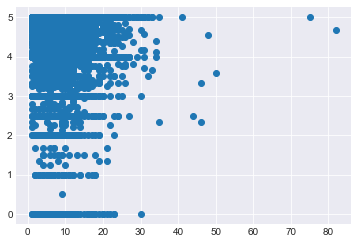

In [65]:
plt.scatter(df_ing['n_steps'], df_ing['avg_rating'])

In [66]:
dlen = []
for i in df['description']:
    if i:
        dlen.append(len(i.split(' ')))
    else:
        dlen.append(0)
df['dlen'] = dlen

In [67]:
dname = []
for i in df['name']:
    if i:
        dname.append(len(i.split(' ')))
    else:
        dname.append(0)
df['dname'] = dname

In [68]:
print('nIngredients:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['n_ingredients'].median())
print('Minutes:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['minutes'].median())
print('nSteps:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['n_steps'].median())
print('Desc length:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['dlen'].median())
print('Name length:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['dname'].median())

nIngredients: 8.0
Minutes: 30.0
nSteps: 8.0
Desc length: 35.0
Name length: 5.0


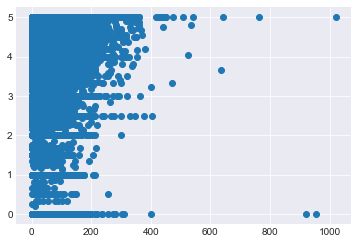

In [69]:
plt.scatter(df['dlen'], df['avg_rating'])

In [70]:
#plt.scatter(df_ing['dlen'], df_ing['avg_rating'])

# Overall name for healthy + vegetarian

In [71]:
irr = ['s', 'with', 'and', 'the', 'for']

In [72]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

def generate_wordcloud(name, series=None, freq=None, irrelevant_words=[], bg='white') -> Counter:
    """Plot wordcloud given series of text.
    
    :param name: name of the figure to save
    :param series: the pd.Series of text
    :param freq: the dictionary of frequencies
    :param irrelevant_words: list of words to exclude
    :param bg: the background color for the cloud
    :return: a collections.Counter of every word
    """
    lo = None
    if series is not None:
        lucastemmer = PorterStemmer()
        text = [lucastemmer.stem(term) for term in word_tokenize(series.str.cat(sep=' '))]
        lo = Counter(text)
        irr = ['s', 'with', 'and']
        lo = {k:v for k,v in lo.items() if k not in irrelevant_words}
    else:
        lo = freq
    
    # Plot
    wordcloud = WordCloud(width = 1920, height = 1080, 
                background_color = bg, 
                stopwords = [' ', '  '], 
                min_font_size = 10).generate_from_frequencies(lo) 

    # plot the WordCloud image
    plt.figure(figsize = (19.2, 10.8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.savefig('imgs/{}.png'.format(name))

    plt.show()
    
    return lo

# Most controversial ingredient (STD per ingredient)

In [73]:
df_con = df.copy()
df_con['ing_text'] = df_con.ingredients.apply(lambda x: ' '.join(['_'.join(ing.split(' ')) for ing in x]))

In [74]:
desc = df_con.std_rating.describe()
desc

count    156948.000000
mean          0.446846
std           0.764981
min           0.000000
25%           0.000000
50%           0.000000
75%           0.577350
max           3.535534
Name: std_rating, dtype: float64

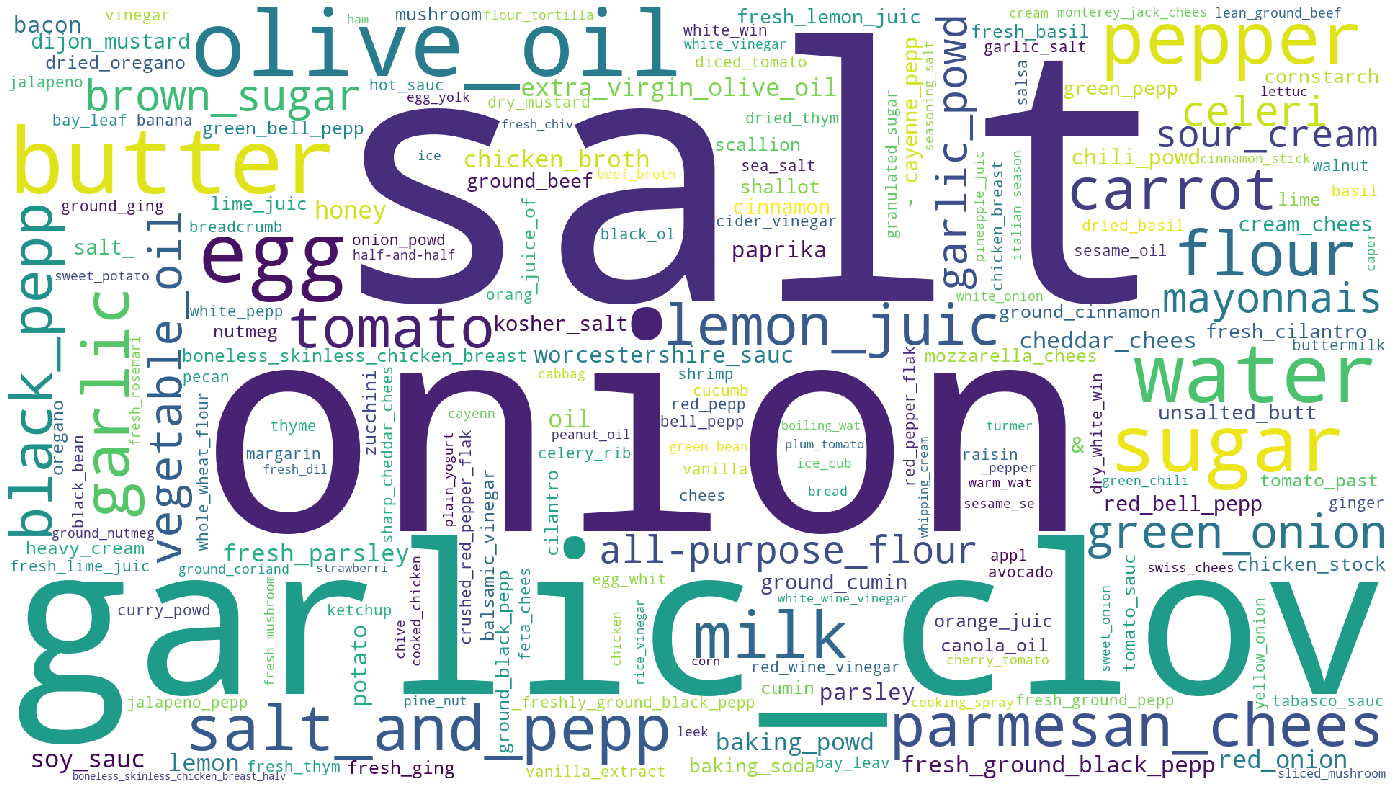

In [75]:
low_size = df_con[df_con.std_rating <= desc['mean']].shape[0]
lo_low = generate_wordcloud('lalala', df_con[df_con.std_rating <= desc['mean']].ing_text, None, irr)

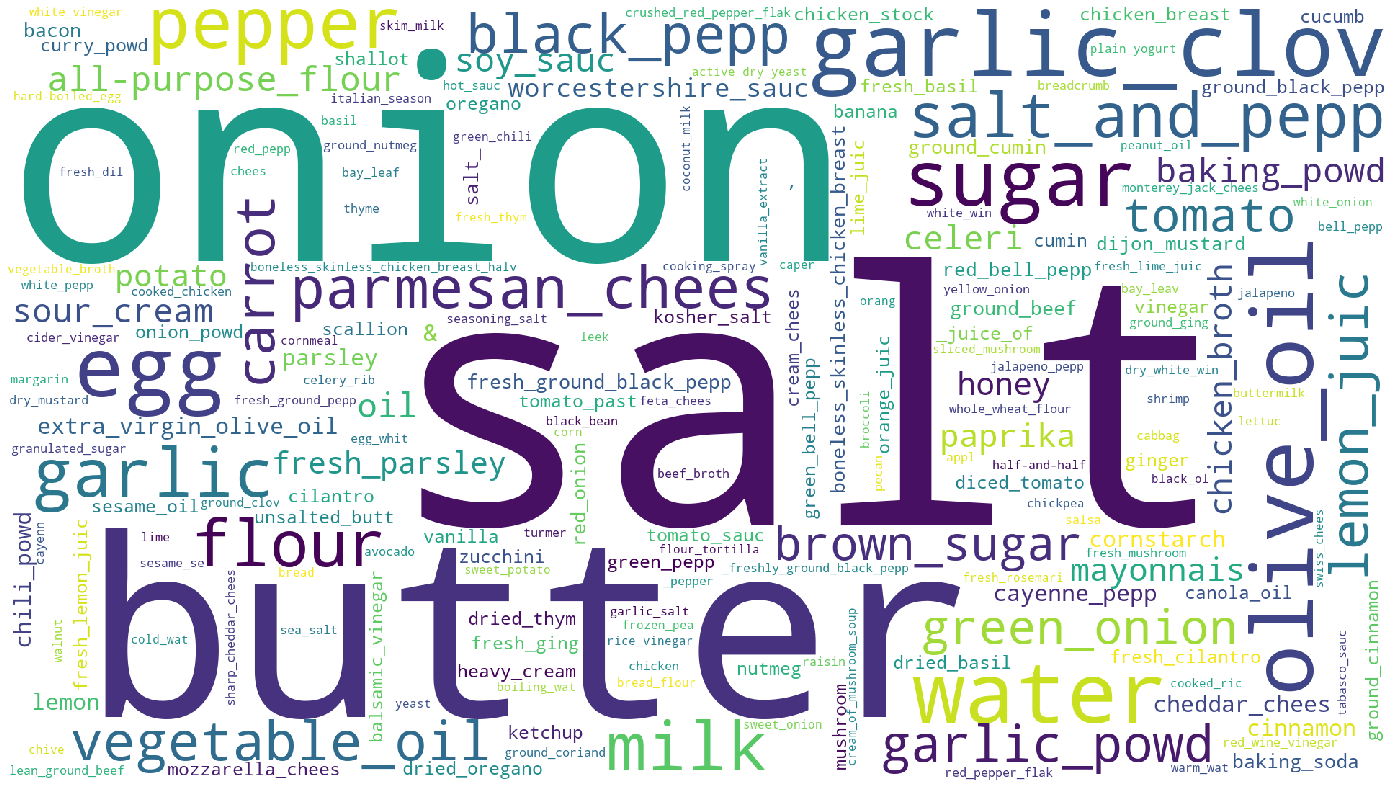

In [76]:
high_size = df_con[df_con.std_rating >= desc['75%']].shape[0]
lo_high = generate_wordcloud('lalala', df_con[df_con.std_rating >= desc['75%']].ing_text, None, irr)

In [77]:
set(list(lo_low.keys()) + list(lo_high.keys()))

{'frozen_light_whipped_dessert_top',
 'worthington_frichik',
 'pickling_salt',
 'pomegranate_powd',
 'quick-cooking_polenta',
 'jello_gelatin',
 'salt_herring_fillet',
 'trout_fillet',
 'deviled_ham',
 "emeril's_kicked_up_horseradish_mustard",
 'marco_polo_noodl',
 'chocolate_fudge_ice_cream',
 'pork_neck',
 'honey_oat_bread',
 'stir-fry_sauc',
 'ham_shank',
 'mandarin_orange_piec',
 'green_pea_soup',
 'pork_leg_steak',
 'hamburger_relish',
 'maple_extract',
 'tomato_juic',
 'assorted_crudit',
 'reduced-sodium_vegetable_broth',
 'nonfat_vanilla_yogurt',
 'szechuan_oil',
 'reduced-fat_beef_broth',
 'tangerine_sherbet',
 'rice-a-roni_broccoli_au_gratin',
 'calvado',
 'low-fat_chocolate_frozen_yogurt',
 'skinless_chicken_breast_halv',
 'coleslaw',
 'plum_juic',
 'mung_bean_noodl',
 'frozen_green_bean',
 'ground_savori',
 'red_sugar_cryst',
 'worthington_wham_vegetable_protein_slic',
 'white_horseradish',
 'rock_lobster_tail',
 'sauterne_white_win',
 'clementine_juic',
 'dulce_de_leche_ice

In [78]:
# Difference between average in high and average in low
lo_diff = {k: - lo_high.get(k, 0)/high_size + lo_low.get(k, 0)/low_size for k in set(list(lo_low.keys()) + list(lo_high.keys()))}

In [79]:
lo_diff = dict(sorted(lo_diff.items(), key=lambda kv: kv[1]))

In [80]:
lo_diff

{'salt': -0.03665620224514138,
 'water': -0.025807490277174633,
 'flour': -0.020347149163066805,
 'onion': -0.01791343298641057,
 'garlic': -0.017699868070250493,
 'egg': -0.01721000065645445,
 'milk': -0.017170294869012434,
 'baking_powd': -0.014739639260688456,
 'butter': -0.01464355968931122,
 'garlic_powd': -0.01275740296077714,
 'sugar': -0.011751956789087803,
 'paprika': -0.010188468347931176,
 'vegetable_oil': -0.00980834704611979,
 'oil': -0.009416929912649148,
 'soy_sauc': -0.009300873975357518,
 'cornstarch': -0.009153335091770121,
 'all-purpose_flour': -0.00801900986542118,
 'boneless_skinless_chicken_breast': -0.006608437612898685,
 'baking_soda': -0.0064322880910563825,
 'parmesan_chees': -0.005914178849269092,
 'chicken_broth': -0.005826856486986928,
 'brown_sugar': -0.005307262366245999,
 'cayenne_pepp': -0.00525338544064646,
 'black_pepp': -0.005205316741261207,
 'cinnamon': -0.004897400221904741,
 'salt_and_pepp': -0.0048450844217477335,
 'potato': -0.00447525596758582

In [81]:
lo_diff2 = dict(sorted(lo_diff.items(), key=lambda kv: kv[1], reverse=True))

In [82]:
lo_diff2

{'garlic_clov': 0.01546793008777897,
 'red_onion': 0.009171897470831504,
 'olive_oil': 0.0087272435824223,
 'tomato': 0.0072356204555045975,
 'extra_virgin_olive_oil': 0.006688940197935547,
 'shallot': 0.0064234803365360756,
 'kosher_salt': 0.00562368593767781,
 'fresh_ground_black_pepp': 0.005477877806553184,
 'avocado': 0.005174375016531271,
 'bacon': 0.004377258025981011,
 'orange_juic': 0.004338997495019484,
 'cream_chees': 0.0041253659702693846,
 'unsalted_butt': 0.0036833751404076152,
 'red_bell_pepp': 0.0035486184666618306,
 'lime': 0.0035060656438915955,
 'strawberri': 0.0033276032404943685,
 'lime_juic': 0.003297507723285825,
 'ice': 0.0032644437332231937,
 'orang': 0.003228692482778151,
 'sea_salt': 0.003115993532753108,
 'cherry_tomato': 0.0030058066475264463,
 'lemon': 0.0029243674728942765,
 'dijon_mustard': 0.002875581071305991,
 'black_ol': 0.0028632254991213333,
 'fresh_cilantro': 0.0028561512813456875,
 'red_wine_vinegar': 0.002740957186389177,
 'walnut': 0.00263376982

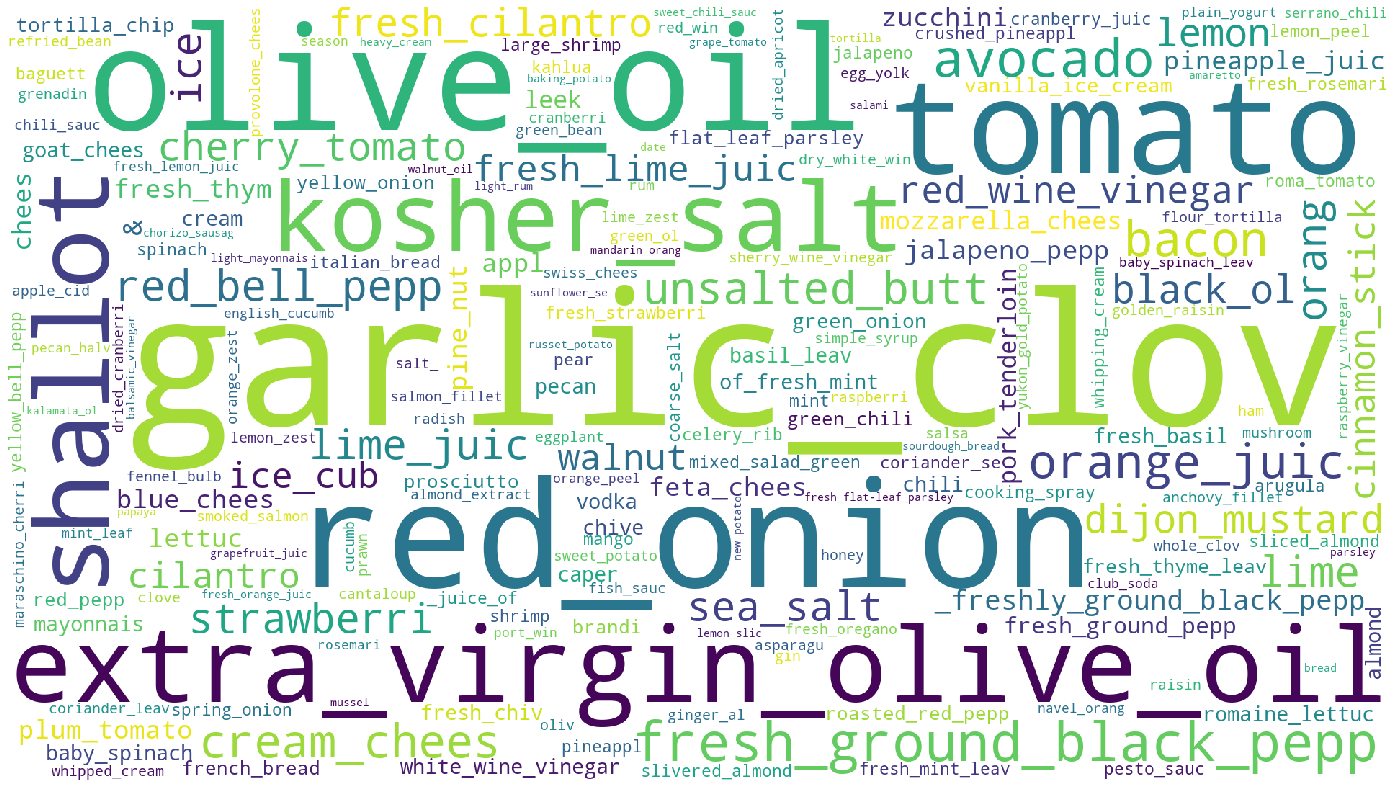

In [83]:
lo_diff_cloud_good = generate_wordcloud('std_low', None, lo_diff2, irr)

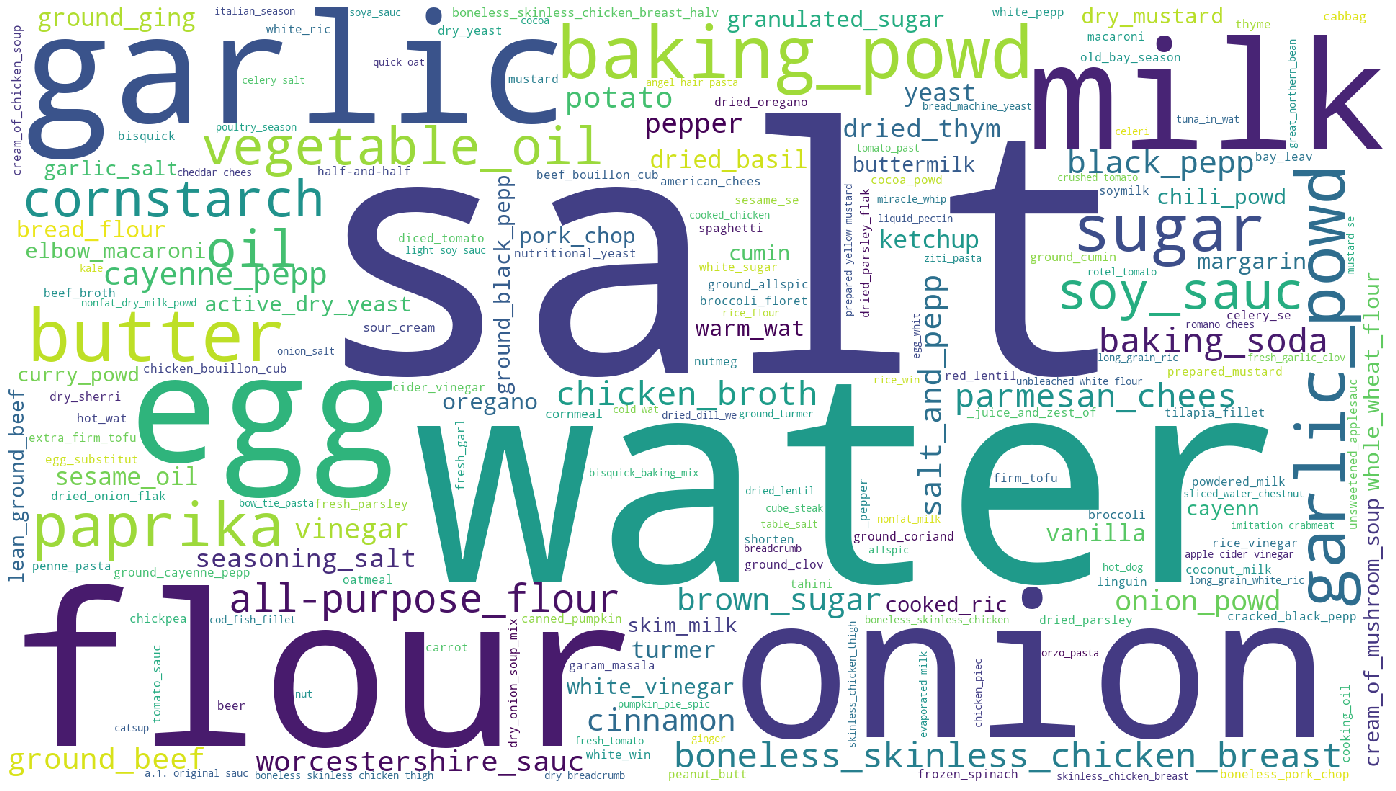

In [84]:
lo_diff_cloud_bad = generate_wordcloud('std_high', None, {k:-v for k, v in lo_diff2.items()}, irr)

# BULLSHIT

In [85]:
index = (df_tag[(df_tag.vegetarian == 1) & (df_tag.inexpensive == 1)]).index
df_interesting = df.loc[index]

In [86]:
tags = [j for i in df_interesting.tags for j in i]

In [87]:
tags_dict = Counter(tags)

In [88]:
tags_dict.most_common(50)

[('preparation', 6157),
 ('vegetarian', 6157),
 ('dietary', 6157),
 ('inexpensive', 6157),
 ('time-to-make', 6133),
 ('course', 6037),
 ('main-ingredient', 5477),
 ('easy', 5112),
 ('occasion', 4474),
 ('cuisine', 3805),
 ('vegetables', 3347),
 ('low-in-something', 2988),
 ('beginner-cook', 2647),
 ('taste-mood', 2351),
 ('low-cholesterol', 2208),
 ('15-minutes-or-less', 1957),
 ('healthy', 1951),
 ('vegan', 1948),
 ('low-calorie', 1830),
 ('side-dishes', 1826),
 ('low-saturated-fat', 1815),
 ('north-american', 1795),
 ('30-minutes-or-less', 1771),
 ('number-of-servings', 1761),
 ('equipment', 1752),
 ('healthy-2', 1706),
 ('low-sodium', 1699),
 ('low-protein', 1661),
 ('main-dish', 1555),
 ('60-minutes-or-less', 1548),
 ('3-steps-or-less', 1505),
 ('dinner-party', 1448),
 ('pasta-rice-and-grains', 1367),
 ('kid-friendly', 1329),
 ('presentation', 1293),
 ('5-ingredients-or-less', 1262),
 ('comfort-food', 1244),
 ('low-fat', 1220),
 ('lunch', 1181),
 ('low-carb', 1180),
 ('american', 1

In [89]:
df_interesting

name  minutes  \
54272                         fool the meat eaters  chili       40   
95926                          say what   banana sandwich        5   
112959                     sour cream  avocado dip  vegan       10   
63793    tide me over   indian chaat  simple veggie salad        2   
70099                                1 asian noodle salad       26   
...                                                   ...      ...   
202637                                 zucchini feta mash       15   
66897                                zucchini onion salad       18   
96811                                             zucotte       65   
89330   zuppa sarda  sardinian cheese and egg soup wit...       30   
207459                         zuppanitz  soup of nothing       70   

        contributor_id  submitted  \
54272            40525 2003-02-17   
95926           118163 2004-07-20   
112959          167849 2005-03-08   
63793            12657 2003-06-05   
70099            75379 2003-09-02   
...                ...        ...   
202637           40114 2006-12-30   
66897            92725 2003-07-16   
96811            65056 2004-08-03   
89330            94272 2004-04-18   
207459          436491 2007-01-24   

                                                     tags  \
54272   [60-minutes-or-less, time-to-make, course, mai...   
95926   [15-minutes-or-less, time-to-make, course, mai...   
112959  [lactose, 15-minutes-or-less, time-to-make, co...   
63793   [15-minutes-or-less, time-to-make, course, mai...   
70099   [30-minutes-or-less, time-to-make, course, mai...   
...                                                   ...   
202637  [15-minutes-or-less, time-to-make, course, mai...   
66897   [30-minutes-or-less, time-to-make, course, mai...   
96811   [time-to-make, course, main-ingredient, prepar...   
89330   [30-minutes-or-less, time-to-make, course, mai...   
207459  [time-to-make, course, main-ingredient, prepar...   

                                          nutrition  n_steps  \
54272     [295.6, 3.0, 56.0, 76.0, 32.0, 1.0, 18.0]        9   
95926     [238.0, 3.0, 66.0, 10.0, 10.0, 2.0, 17.0]        4   
112959         [12.8, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]        6   
63793         [73.1, 1.0, 15.0, 0.0, 5.0, 3.0, 4.0]        4   
70099      [231.1, 7.0, 21.0, 32.0, 8.0, 3.0, 14.0]        7   
...                                             ...      ...   
202637   [190.2, 22.0, 19.0, 17.0, 15.0, 31.0, 3.0]        8   
66897      [231.1, 28.0, 27.0, 8.0, 8.0, 56.0, 5.0]       10   
96811      [145.7, 13.0, 10.0, 2.0, 3.0, 27.0, 5.0]       10   
89330   [733.4, 65.0, 12.0, 46.0, 71.0, 78.0, 17.0]       10   
207459      [133.9, 12.0, 6.0, 2.0, 3.0, 16.0, 4.0]       10   

                                                    steps  \
54272   [rehydrate tvp if needed, spray or oil a large...   
95926   [spread a tablespoon on one side of each slice...   
112959  [peel and pit avocado , put in a large mixing ...   
63793   [toss everything well in a serving bowl, grab ...   
70099   [bring a large pot of water to boil, add rice ...   
...                                                   ...   
202637  [juice the lemon, grate the zucchini coarsely,...   
66897   [grate zucchini, dice onion, over medium heat ...   
96811   [in a large , heavy saucpan , melt 1 tbs of th...   
89330   [preheat oven to 350 degrees f, brush bread sl...   
207459  [add oil to stock pot over medium heat, add ch...   

                                              description  \
54272   this recipe was adapted by my mother and mysel...   
95926              you just have to try it to believe it.   
112959  i made this up when i had an avocado that was ...   
63793   this version of the famous indian chaat (prono...   
70099   i am addicted to this! and it's so easy to mak...   
...                                                   ...   
202637  a nice and healthy alternative for mashed pota...   
66897   i wrinkled my nose at this in the be

In [90]:
df_ing[(df_ing.onion == 1) & (df_ing.submitted == np.datetime64('2002'))].shape[0] / df[df.submitted.astype('datetime64[Y]') == np.datetime64('2002')].shape[0]

0.03441275978733688

In [91]:
total_dict

{Timestamp('1999-01-01 00:00:00'): 901,
 Timestamp('2000-01-01 00:00:00'): 550,
 Timestamp('2001-01-01 00:00:00'): 2373,
 Timestamp('2002-01-01 00:00:00'): 10345,
 Timestamp('2003-01-01 00:00:00'): 9913,
 Timestamp('2004-01-01 00:00:00'): 9589,
 Timestamp('2005-01-01 00:00:00'): 15731,
 Timestamp('2006-01-01 00:00:00'): 18637,
 Timestamp('2007-01-01 00:00:00'): 24827,
 Timestamp('2008-01-01 00:00:00'): 22805,
 Timestamp('2009-01-01 00:00:00'): 17137,
 Timestamp('2010-01-01 00:00:00'): 9391,
 Timestamp('2011-01-01 00:00:00'): 6022,
 Timestamp('2012-01-01 00:00:00'): 4081,
 Timestamp('2013-01-01 00:00:00'): 3099,
 Timestamp('2014-01-01 00:00:00'): 823,
 Timestamp('2015-01-01 00:00:00'): 244,
 Timestamp('2016-01-01 00:00:00'): 138,
 Timestamp('2017-01-01 00:00:00'): 205,
 Timestamp('2018-01-01 00:00:00'): 137}

In [92]:
df[df.submitted.astype('datetime64[Y]') == np.datetime64('2018')].shape[0]

137